Assignment No.1:k-nearest neighbors


Before running this block, make sure to upload "data.mat" in the google drive.

In [1]:
#Enter your path of dataset from google drive
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/Fall-24/Machine Learning/Assignment 1 KNN/"

dataset = path + "data.mat"

#Enter path of your test image
test_image=path+"image.jpg"
mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']
images.shape

Mounted at /content/drive/


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read.

In [2]:
import numpy as np
images= np.transpose(images) #takes transpose of images dataset and stores it back in images
images.shape #images have a shape of 3072 x 50
im = np.reshape(images, [ 32, 32, 3, -1], order="F") #reshaping images to 32x32x3x50 and storing in im

(32, 32, 3)


(32, 32, 3)

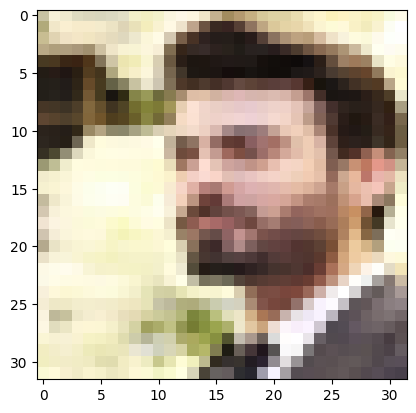

In [3]:
from matplotlib import pyplot as plt
#import cv2

plt.imshow(im[:,:,:,40]) #plotting the 40th image in im dataset
print(im[:,:,:,0].shape)
a= im[:,:,:,40]
plt.imshow(a)
a.shape

You Need to write your code in this block.

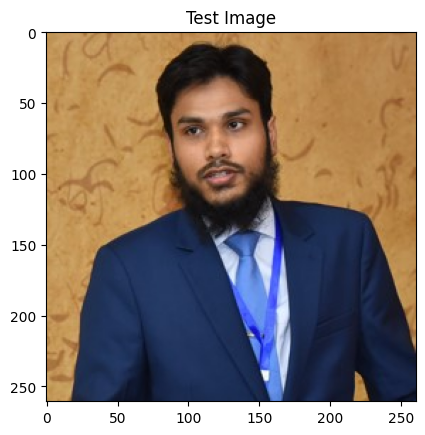

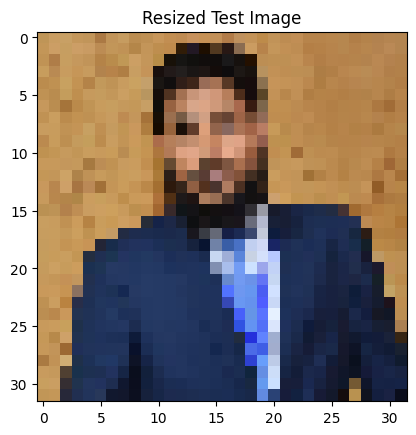


 Shape of final reshaped test image:  (3072,)


In [4]:
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray


for i in range(50): #for loop to reshape dataset images
    G = im[:,:,:,i]  #assigning G a image in im dataset coresponding to i value
    G = np.reshape(G,[-1], order="F") #Flattening image to 1D array using column-major order

    #Read your image here
####### Your code here #######

import os
os.chdir('/content/drive/My Drive/Fall-24/Machine Learning/Assignment 1 KNN/')#changing current directory of colab to where I have stored my image
test = plt.imread('image.jpg')  #reading my image and storing it in test
plt.title("Test Image") #Printing title of image
plt.imshow(test) #plotting my image
plt.show()
############################


    #Resize your image
####### Your code here #######

test2 = cv2.resize(test, dsize=(32, 32), interpolation=cv2.INTER_CUBIC) #resizing my image to 32x32x3 using cv2 resize function and storing it in test2
plt.title("Resized Test Image") #Printing title of image
plt.imshow(test2)   #plotting my resized image
plt.show()
##############################


  #Reshape your image as we reshape the image of dataset
####### Your code here #######
test3 = np.reshape(test2,[-1], order="F")   #reshaping my resized image into a 1D vector using column-major order
print("\n Shape of final reshaped test image: ", test3.shape) #Priniting final shape of test image

#############################
    #Calculate Eucleadian distance between your image and dataset
####### Your code here #######

test3 = test3 / 255.0 # Normalizing test image values
im = im / 255.0 # Normalizing  dataset images values
dist=np.zeros((1,im.shape[3])) #creating a numpy zero array of dimension 1 x 50 (as we have 50 image)  to store Eucleadian distance between my image and each dataset images
for i in range(50): #looping through each dataset image
  G = im[:,:,:,i]  #assigning G an image in im dataset coresponding to i value
  G = np.reshape(G,[-1], order="F") #Flattening image to 1D array using column-major order
  temp = test3 - G  #subtracting my final test image and current dataset image and storing value in temp
  dist[0,i]= np.sqrt(np.dot(temp.T, temp)) #calculating Eucledian distance between my test image and current dataset image and storing it in dist array corresponding to 0,i index location

##############################

In this Block you need to fill the code for 1-NN.

Minimum distance:  15.073046285897005
Minimum value is at index no  42 of the dataset



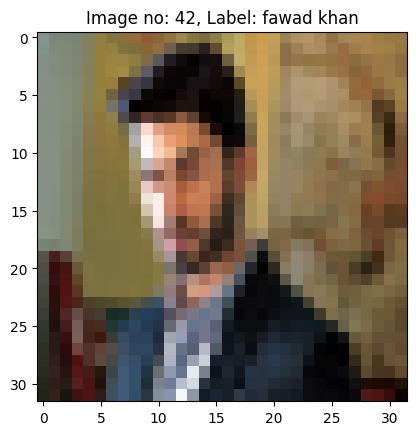

In [5]:
# Write code for 1 NN
#Find min distance
#Find at which point min value exists

####### Your code here #######

N1 = np.min(dist) #Finding min value in dist and storing it in N1
print("Minimum distance: ", N1) #Printing minimum distance for 1NN
pos1 = np.where(dist==N1) #getting index values of dist array where N1 is stored
pos1 = pos1[1][0] #Storing the first element of the second array which will be out image number out of 50 in the dataset
print("Minimum value is at index no ", str(pos1), "of the dataset\n") #Printing the point where minimum value exists

plt.title("Image no: " + str(pos1) + ", Label: " + str(label[pos1][0][0])) #Printing the image number where the minimum value exists and label of that image as title of image
plt.imshow(im[:,:,:,pos1])  #plotting the image at min position
plt.show()
##############################


Write code for 3 NN


1 Minimum distance:  15.073046285897005
2 Minimum distance:  15.168864689833242
3 Minimum distance:  15.34001509297406


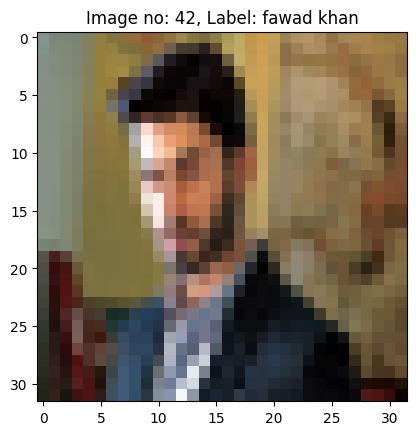

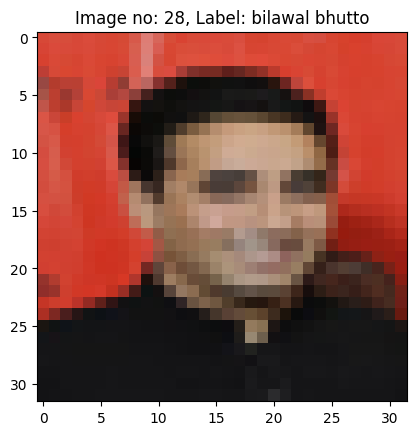

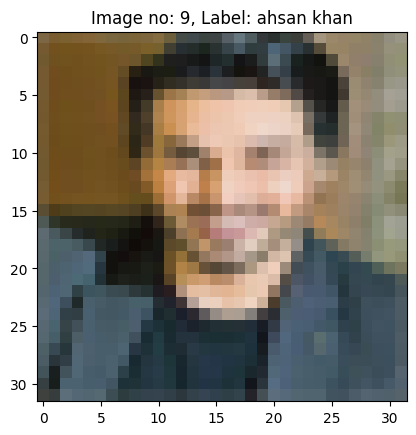


As per majority voting scheme for k=3, test image mostly resembles:  fawad khan


In [6]:
#3 NN
#Write code for 3 NN
#Find 3 min distances
#Find their instances
#hint: Use for Loop

####### Your code here #######

sort_dist=np.sort(dist) #sorting dist array in ascending order  and storing it in sort_dist
N3 = sort_dist[0,0:3] #storing 1st three minimum distances in N3
pos3 = [[] for _ in range (3)]   #crearting empty list of length 3
for i in range(3):
  print(i+1,"Minimum distance: ",N3[i]) #Printing the minimum distances in N3
  pos3[i] = np.where(dist==N3[i])  #getting index values of dist array where N3 values are stored
pos3=[pos3[i][1][0] for i in range(3)]  #extracts the first element of the second array within each tuple i and creates a new list with these extracted elements. This will be image number

for i in range (3): #Loop to print images with minimum distance or those that resemble test image
  plt.title("Image no: " + str(pos3[i]) + ", Label: " + str(label[pos3[i]][0][0])) #Printing the image number and label as title of image
  plt.imshow(im[:,:,:,pos3[i]]) #plotting the image correspoding to i index value
  plt.show()

from collections import Counter
def knn(pos, k): #Function for majority voting
  nearest_labels = [str(label[i][0]) for i in pos] # Get the corresponding labels for these indices and convert to a hashable type
  most_common_label = Counter(nearest_labels).most_common(1)[0][0]      # Majority voting: counts the number of instances of same label and outputs that label
  return most_common_label     # returns the most common label or majority

majority_label_3nn = knn(pos3, 3) # Calling majority label function with k=3 as input
majority_label_3nn = majority_label_3nn.strip("[]'\"")  # removing brackets and quotes
print("\nAs per majority voting scheme for k=3, test image mostly resembles: ", majority_label_3nn)

Write code for 5 NN

1 Minimum distance:  15.073046285897005
2 Minimum distance:  15.168864689833242
3 Minimum distance:  15.34001509297406
4 Minimum distance:  15.362897630535237
5 Minimum distance:  15.688474355550555


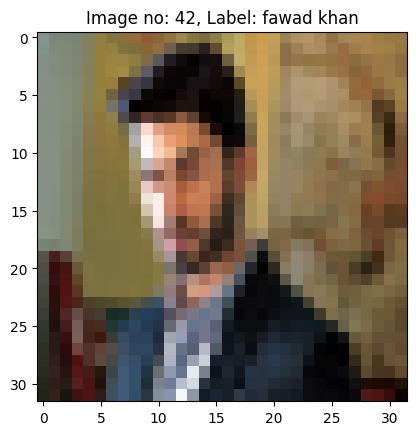

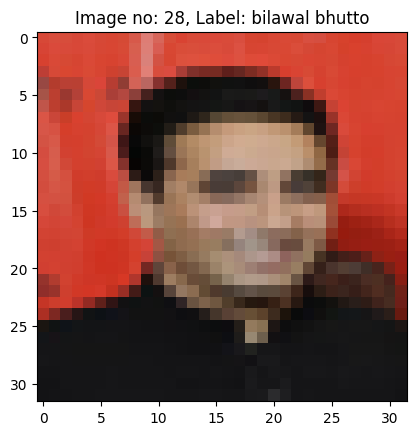

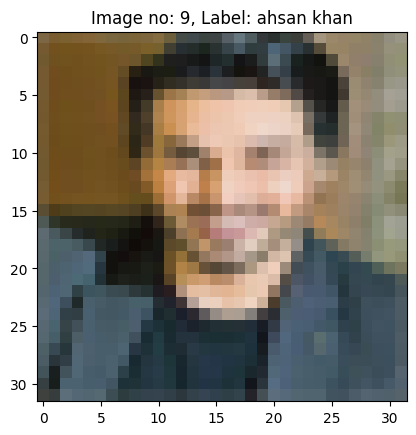

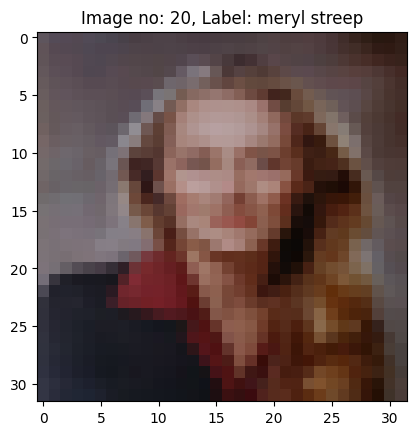

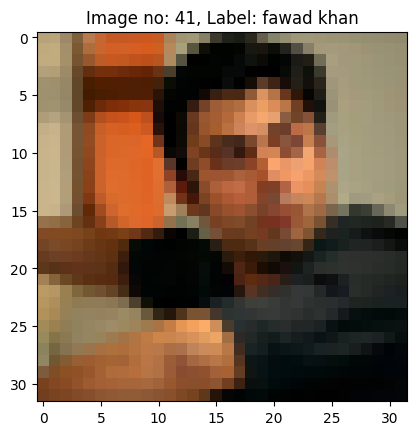


As per majority voting scheme for k=5, test image mostly resembles:  fawad khan


In [7]:
#Write code for 5 NN
#Find 5 min distances
#Find their instances

####### Your code here #######
sort_dist=np.sort(dist)  #sorting dist array in ascending order  and storing it in sort_dist
N5 = sort_dist[0,0:5]  #storing 1st three minimum distances in N5
pos5 = [[] for _ in range (5)]   #crearting empty list of length 5
for i in range(5):
  print(i+1,"Minimum distance: ",N5[i]) #Printing the minimum distances in N5
  pos5[i] = np.where(dist==N5[i])  #getting index values of dist array where N3 values are stored
pos5=[pos5[i][1][0] for i in range(5)] #extracts the first element of the second array within each tuple i and creates a new list with these extracted elements. This will be image number

for i in range (5):  #Loop to print images with minimum distance or those that resemble test image
  plt.title("Image no: " + str(pos5[i]) + ", Label: " + str(label[pos5[i]][0][0]))  #Printing the image number and label as title of image
  plt.imshow(im[:,:,:,pos5[i]])  #plotting the image correspoding to i index value
  plt.show()

from collections import Counter
def knn(pos, k):
  nearest_labels = [str(label[i][0]) for i in pos]   # Get the corresponding labels for these indices and convert to a hashable type
  most_common_label = Counter(nearest_labels).most_common(1)[0][0]  # Majority voting: counts the number of instances of same label and outputs that label
  return most_common_label  # returns the most common label or majority

majority_label_5nn = knn(pos5, 5)  # Calling majority label function with k=5 as input
majority_label_5nn = majority_label_5nn.strip("[]'\"") #removing brackets and quotes
print("\nAs per majority voting scheme for k=5, test image mostly resembles: ", majority_label_5nn)

##############################